разбейте исходную таблицу на 2: по полу пассажиров
удалите пустые строки или заполните их соответствующими символами
Построить гистограмму распределения пассажиров по возрасту
Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
визуализировать возраст при помощи различных настроек метода plot

In [22]:
import pandas as pd
import numpy as np

data_directory = "data"
df = pd.read_csv(data_directory+'/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
# Заполнение пустых значений возраста средним
df['Age'] = df['Age'].fillna(df['Age'].median())

In [24]:
# Разделение на мужскую и женскую таблицы
male_df = df[df['Sex'] == 'male']

In [25]:
female_df = df[df['Sex'] == 'female']

In [27]:
# Статистика для мужчин
male_stats = {
    'Минимум': df[df['Sex'] == 'male']['Age'].min(),
    'Максимум': df[df['Sex'] == 'male']['Age'].max(),
    'Среднее': df[df['Sex'] == 'male']['Age'].mean(),
    'Медиана': df[df['Sex'] == 'male']['Age'].median(),
    'Мода': df[df['Sex'] == 'male']['Age'].mode()[0]
}

# Статистика для женщин
female_stats = {
    'Минимум': df[df['Sex'] == 'female']['Age'].min(),
    'Максимум': df[df['Sex'] == 'female']['Age'].max(),
    'Среднее': df[df['Sex'] == 'female']['Age'].mean(),
    'Медиана': df[df['Sex'] == 'female']['Age'].median(),
    'Мода': df[df['Sex'] == 'female']['Age'].mode()[0]
}

print("Статистика возраста для мужчин:")
for key, value in male_stats.items():
    print(f"{key}: {value}")

print("\nСтатистика возраста для женщин:")
for key, value in female_stats.items():
    print(f"{key}: {value}")

Статистика возраста для мужчин:
Минимум: 0.42
Максимум: 80.0
Среднее: 30.14067590987868
Медиана: 28.0
Мода: 28.0

Статистика возраста для женщин:
Минимум: 0.75
Максимум: 63.0
Среднее: 27.929936305732483
Медиана: 28.0
Мода: 28.0


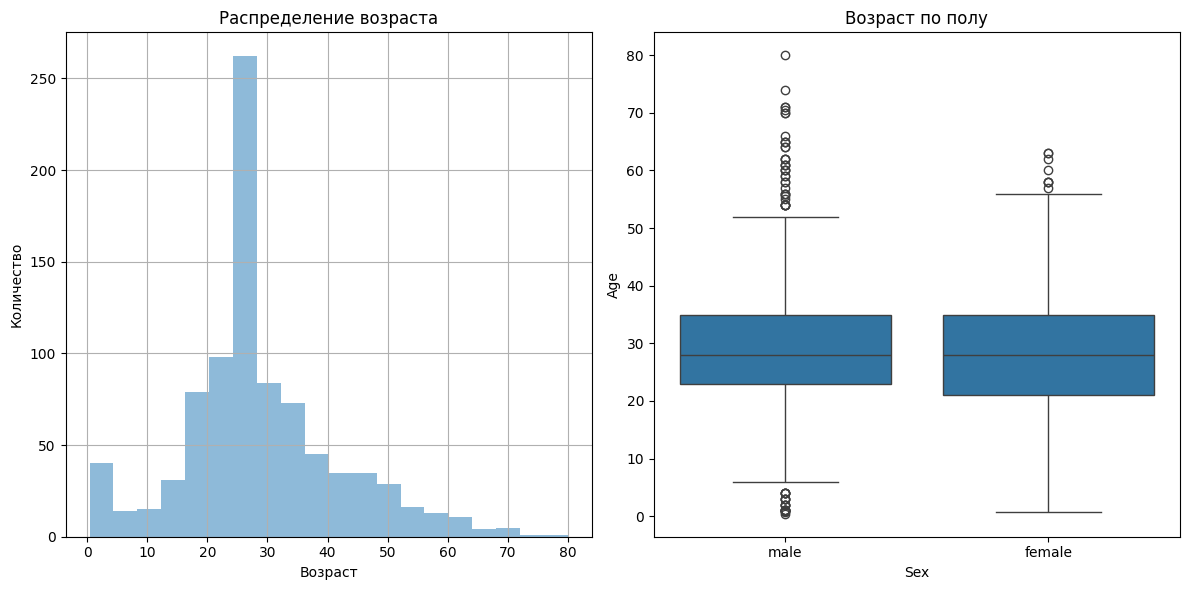

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))

# Гистограмма
plt.subplot(1,2,1)
df['Age'].hist(bins=20, alpha=0.5)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# Ящик с усами
plt.subplot(1,2,2)
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Возраст по полу')

plt.tight_layout()
plt.show()


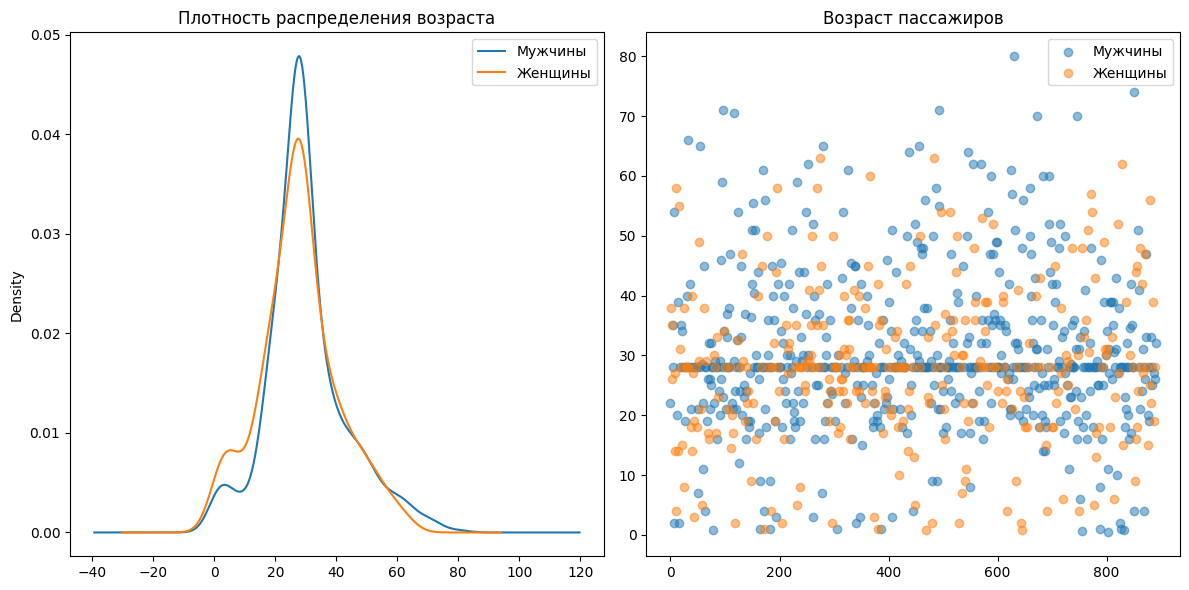

In [15]:
plt.figure(figsize=(12,6))

# Плотность распределения
plt.subplot(1,2,1)
df[df['Sex'] == 'male']['Age'].plot(kind='density', label='Мужчины')
df[df['Sex'] == 'female']['Age'].plot(kind='density', label='Женщины')
plt.title('Плотность распределения возраста')
plt.legend()

# Scatter plot
plt.subplot(1,2,2)
plt.scatter(male_df.index, male_df['Age'], label='Мужчины', alpha=0.5)
plt.scatter(female_df.index, female_df['Age'], label='Женщины', alpha=0.5)
plt.title('Возраст пассажиров')
plt.legend()

plt.tight_layout()
plt.show()